In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import layers,models

2023-04-10 22:25:25.691735: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-10 22:25:26.542106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:25:29.883192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:25:29.893451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 22:26:00.276764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [6]:
train_path='../Training'
test_path='../Validation'

male_train='../Training/male'
female_train='../Training/female'

male_test='../Validation/male'
female_test='../Validation/female'

In [13]:
train_category=os.listdir(train_path)
train_images = []
for cate in train_category:
    folder = train_path + "/" + cate
    train_images.append(len(os.listdir(folder)))

test_category=os.listdir(test_path)
test_images = []
for cate in test_category:
     folder = test_path +"/"+ cate
     test_images.append(len(os.listdir(folder)))

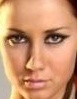

In [23]:
Image.open('../Training/female/131485.jpg.jpg')

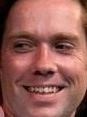

In [27]:
Image.open('../Training/male/090544.jpg.jpg')

In [29]:
fe_train = []
label1 = []
for i in os.listdir(female_train):
    if os.path.isfile(female_train + '/' + i):
        female=Image.open(female_train + '/' + i)
        female=female.resize((50,50), Image.ANTIALIAS).convert("L")
        female=np.asarray(female)/255.0

        fe_train.append(female)
        label1.append(0)

ma_train=[]
for i in os.listdir(male_train):
    if os.path.isfile(male_train + '/' + i):
        male=Image.open(male_train + '/' + i)
        male=male.resize((50,50),Image.ANTIALIAS).convert("L")
        male=np.asarray(male)/255.0
        
        ma_train.append(male)
        label1.append(1)

/tmp/ipykernel_499/982432557.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  female=female.resize((50,50), Image.ANTIALIAS).convert("L")
/tmp/ipykernel_499/982432557.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  male=male.resize((50,50),Image.ANTIALIAS).convert("L")


In [ ]:
x_train=np.concatenate((fe_train,ma_train),axis=0)
y_train=np.asarray(label1)
y_train=y_train.reshape(x_train.shape[0],1) 

In [ ]:
print(x_train.shape)

In [ ]:
print(y_train.shape)